# Normal Equation 

In [3]:
import numpy as np

X = np.array([[3,4], [2,16]])
print(X)

y = np.array([8, 9])
print(y)

[[ 3  4]
 [ 2 16]]
[8 9]


### compute below equation

- matrix multiplication: https://numpy.org/doc/stable/reference/generated/numpy.matmul.html

𝜃 = (X<sup>T</sup> X)<sup>-1</sup> X<sup>T</sup> y

In [4]:
X.transpose() 

np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(), X)), X.transpose()), y) 

array([2.3  , 0.275])

# Quiz
### Question 1

In [2]:
x1 = int((7921 + 5184 + 8836 + 4761) / 4)
x2 = (7921 + 5184 + 8836 + 4761) / 4

print(x1, x2)

6675 6675.5


In [3]:
y = (5184 - 6675.5) / 4
y


-372.875

### Question 2

# Python to replace Octave/Matlab Tutorial 

## 1. Basic operations

In [15]:
import numpy as np
# 1. xor (exclusive or)
print(1 ^ 0)
print(1 ^ 1)

# create 1-D array
x = [ [0 for i in range(5)] ]
print(x)

# create 2-D array
x = [ [0 for i in range(3)] for j in range(5)]
print(x)

# create 2-D array via numpy
y = np.array([ [0 for i in range(3)] for j in range(5)])
print(y)

# create identity matrix
print(np.identity(3))

1
0
[[0, 0, 0, 0, 0]]
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 2. Moving data around

In [40]:
import numpy as np
import pandas as pd

# 1. create 2-d array
print('=========1. create 2-d array=========')
x = np.array( [[1 for col in range(5)] for row in range(10)] )
print(x)
# x[0]


# 2. append extra column
print('=========2. append extra column=========')
x_column = np.array([[2 for col in range(1)] for row in range(10)])
print(x_column)

y = np.c_[x, x_column]

print(y)

# check array size
# https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html
print(y.size)
# check array shape
print(y.shape)


# 3. append extra rows
print('=========3. append extra rows=========')
x_row = np.array([[3 for col in range(5)] for row in range(2)])
z = np.r_[x, x_row]

print(z)
print(z.size)
print(z.shape)



# 4. read array as a dataframe
# https://www.geeksforgeeks.org/make-a-pandas-dataframe-with-two-dimensional-list-python/
print('=========4. read array as a dataframe=========')
df = pd.DataFrame(x, columns=['Tag', 'name', 'age', 'salary', 'score'])
print(df)

df.head()






=========1. create 2-d array=========
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
=========2. append extra column=========
[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
[[1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]
 [1 1 1 1 1 2]]
60
(10, 6)
=========3. append extra rows=========
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [3 3 3 3 3]
 [3 3 3 3 3]]
60
(12, 5)
=========4. read array as a dataframe=========
   Tag  name  age  salary  score
0    1     1    1       1      1
1    1     1    1       1      1
2    1     1    1       1      1
3    1     1    1       1      1
4    1     1    1       1      1
5    1     1    1       1      1
6    1     1    1       1      1
7    1     1    1       1      1
8    1     1    1       1 

,Tag,name,age,salary,score
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


## 3. Computing on Data

### 3.1 define a magic method

In [203]:
# magic method
def magic(n):
  n = int(n)
  if n < 3:
    raise ValueError("Size must be at least 3")
  if n % 2 == 1:
    p = np.arange(1, n+1)
    return n*np.mod(p[:, None] + p - (n+3)//2, n) + np.mod(p[:, None] + 2*p-2, n) + 1
  elif n % 4 == 0:
    J = np.mod(np.arange(1, n+1), 4) // 2
    K = J[:, None] == J
    M = np.arange(1, n*n+1, n)[:, None] + np.arange(n)
    M[K] = n*n + 1 - M[K]
  else:
    p = n//2
    M = magic(p)
    M = np.block([[M, M+2*p*p], [M+3*p*p, M+p*p]])
    i = np.arange(p)
    k = (n-2)//4
    j = np.concatenate((np.arange(k), np.arange(n-k+1, n)))
    M[np.ix_(np.concatenate((i, i+p)), j)] = M[np.ix_(np.concatenate((i+p, i)), j)]
    M[np.ix_([k, k+p], [0, k])] = M[np.ix_([k+p, k], [0, k])]
  return M 

### 3.2 test

In [133]:
import numpy as np

A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[11, 12], [13, 14], [15, 16]])
C = np.array([[1, 1], [2, 2]])

# 1. matrix multiplication
# https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
print('\n1. A and C matrix multiplication: \n', np.matmul(A, C))


# 2. multiplication element-wise operation
# https://numpy.org/doc/stable/reference/generated/numpy.multiply.html
print('\n2. A and B matrix multiplication: \n', np.multiply(A, B))

# 3. square
# https://numpy.org/doc/stable/reference/generated/numpy.square.html
print('\n3. A square \n', np.square(A))


# 4. divide element-wise operation
# https://numpy.org/doc/stable/reference/generated/numpy.divide.html
v = np.array([[1], [2], [3]])
print('\n4. one divide by v matrix \n', np.divide(1, v) )
print('\n4. one divide by A matrix \n', np.divide(1, A) )

# 5. logrithm
# https://numpy.org/doc/stable/reference/generated/numpy.log.html
print('\n5. log of A matrix \n', np.log(v))


# 6. exponential
# https://numpy.org/doc/stable/reference/generated/numpy.exp.html
print('\n6. exponential of A matrix \n', np.exp(v))

# 7. absolute
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
print('\n7. abs of matrix \n', np.abs([[-1], [2], [-3]]))

# 8. addition
print('\n8. addition of constant + A matrix \n', v + 1)

# 9. transpose
# https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
print('\n9. tanspose of matrix v \n', np.transpose(v))
print('\n9. tanspose of matrix v \n', np.transpose(np.transpose(v)))

# 10. max
# https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html
print('\n10. max of of vector v \n', np.max(v))

val = np.max(v)
# 11. argmax to get index of max value in array
# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
idx = np.argmax(v)
# cannot extract value and index
# [val, idx] = np.max(v)
print('\n11. max values index of matrix v \n', val, idx)

# 12. element-wise comparison
print('\n12.element-wise comparison\n', v < 3)


# 13. find element index that meet condition 
# https://numpy.org/doc/stable/reference/generated/numpy.where.html
print('\n13. where() element-wise comparison\n', np.where(v < 3))


# 14. magic() equivalent
# https://stackoverflow.com/a/47840614
magicArray = magic(3)
print('\n14.1 output self-made magic method \n', magicArray)


print('\n14.2 find element index by condtion \n', np.where(magicArray > 8))
# >> array([2]) - row
# >> array([1]) - col

# 15. sum()
# https://numpy.org/doc/stable/reference/generated/numpy.sum.html
print('\n15. sum of matrix all elements \n', np.sum(magicArray))

# 16. floor()
print('\n16. floor of matrix all elements \n', np.floor(magicArray))

# 17. ceil()
print('\n17. ceil of matrix all elements \n', np.ceil(magicArray))


# 18. max() by row axis=1
print('\n18. max() by row\n', np.max(magicArray, axis=1))

# 19. max() by column axis=0
print('\n19. max() by column\n', np.max(magicArray, axis=0))


magicArray = magic(9)
print('\nmagicArray of 9\n', magicArray)

# 20. sum() by row
print('\n20. max() by row\n', np.sum(magicArray, axis=1))

# 21. sum() by col
print('\n21. sum() by column\n', np.sum(magicArray, axis=0))


# 22. identity()
id9 = np.identity(9).astype(int)
print('\n22. identity of 9 \n', id9)

# 23. array matrix multiply identity array equal to itself
print('\n 23. array matrix multiply identity array equal to itself \n', np.matmul(magicArray, id9))

# 24. array dot matrix identity array equal to diagonal matrix
print('\n 24. array dot matrix identity array equal to diagonal matrix \n', np.multiply(magicArray, id9))


# 25. get sum() of all elements
print('\n25. get sum() of all elements\n', np.sum(np.multiply(magicArray, id9)) )


# 26. flipud()
# https://numpy.org/doc/stable/reference/generated/numpy.flipud.html
print('\n26. flipud()\n', np.flipud(id9))


# 27. inverse() of magicArray
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
print('\n27. inverse() of magicArray\n', np.linalg.inv(magicArray))

# 28. matrix invert()
# https://numpy.org/doc/stable/reference/generated/numpy.invert.html
print('\n28. matrix invert()\n', np.invert(magicArray) )




1. A and C matrix multiplication: 
 [[ 5  5]
 [11 11]
 [17 17]]

2. A and B matrix multiplication: 
 [[11 24]
 [39 56]
 [75 96]]

3. A square 
 [[ 1  4]
 [ 9 16]
 [25 36]]

4. one divide by v matrix 
 [[1.        ]
 [0.5       ]
 [0.33333333]]

4. one divide by A matrix 
 [[1.         0.5       ]
 [0.33333333 0.25      ]
 [0.2        0.16666667]]

5. log of A matrix 
 [[0.        ]
 [0.69314718]
 [1.09861229]]

6. exponential of A matrix 
 [[ 2.71828183]
 [ 7.3890561 ]
 [20.08553692]]

7. abs of matrix 
 [[1]
 [2]
 [3]]

8. addition of constant + A matrix 
 [[2]
 [3]
 [4]]

9. tanspose of matrix v 
 [[1 2 3]]

9. tanspose of matrix v 
 [[1]
 [2]
 [3]]

10. max of of vector v 
 3

11. max values index of matrix v 
 3 2

12.element-wise comparison
 [[ True]
 [ True]
 [False]]

13. where() element-wise comparison
 (array([0, 1]), array([0, 0]))

14.1 output self-made magic method 
 [[8 1 6]
 [3 5 7]
 [4 9 2]]

14.2 find element index by condtion 
 (array([2]), array([1]))

15. sum of mat

### 3.3 test on matrix multiply and odt multiply

In [124]:
arr1 = np.array([[2, 3, 5], [7, 10, 20], [100, 0, -1]])
arr2 = np.identity(3).astype(int)

print(arr1)
print(arr2)

print(type(arr1[0,0]))
print(type(arr2[0,0]))

print(arr1 @ arr2)
print(arr1 * arr2)


[[  2   3   5]
 [  7  10  20]
 [100   0  -1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
<class 'numpy.int64'>
<class 'numpy.int64'>
[[  2   3   5]
 [  7  10  20]
 [100   0  -1]]
[[ 2  0  0]
 [ 0 10  0]
 [ 0  0 -1]]


# 4. Plotting Data

### 4.1 plot a sin function
https://scriptverse.academy/tutorials/python-matplotlib-plot-sine.html

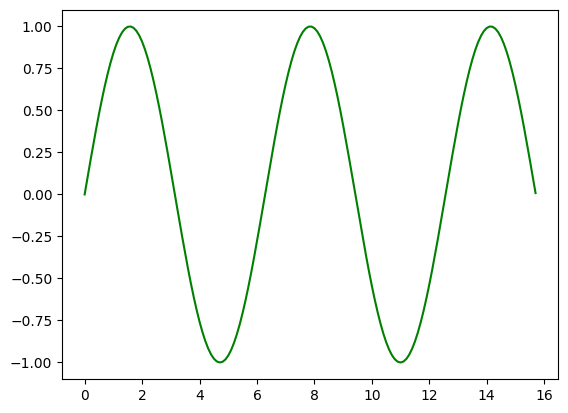

In [134]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.arange(0, 5*np.pi, 0.1)
y = np.sin(x)

plt.plot(x, y, color='green')
plt.show()

### 4.2 plot a cos function

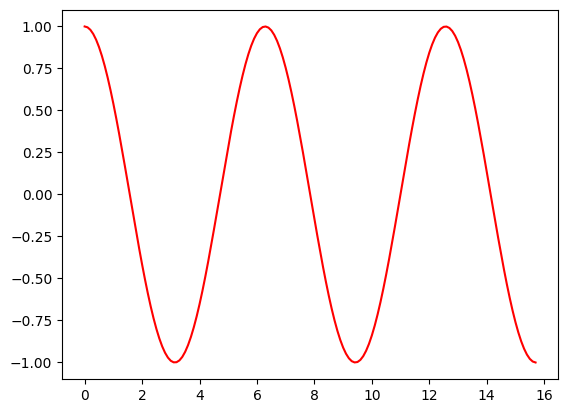

In [135]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.arange(0, 5*np.pi, 0.1)
y = np.cos(x)

plt.plot(x, y, color='red')
plt.show()

### 4.3 plot a sin and cos function

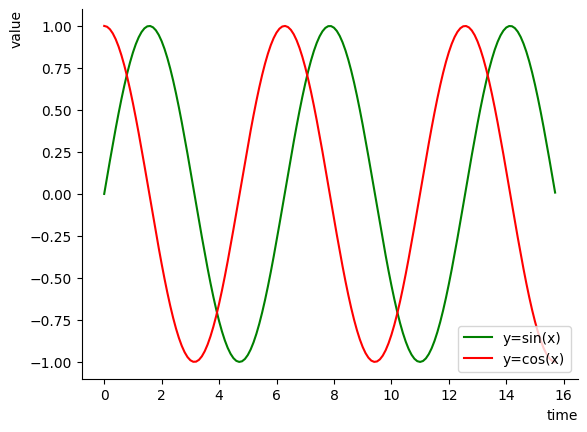

In [197]:
import numpy as np
import matplotlib.pyplot as plt 

# 1. setup linearly spaced numbers
x = np.arange(0, 5*np.pi, 0.1)
# x = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x)
y2 = np.cos(x)

# 2. setup axes at the center
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


# 3. plt the function
plt.plot(x, y1, color='green', label='y=sin(x)')
plt.plot(x, y2, color='red', label='y=cos(x)')
plt.xlabel(xlabel='time', loc='right')
plt.ylabel(ylabel='value', loc='top', rotation=90) # rotate ylabel https://stackoverflow.com/a/27671918


# 4. display legend
# 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'
# plt.legend(loc='upper right')
plt.legend(loc='best')


# 5. save to local
# fix savefig() is blank
# https://blog.csdn.net/qq_38410428/article/details/89473470
plt.savefig('sin_cos.png')

# 6. show the plt
plt.show()



### 4.4 subplot
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

Text(0.5, 1.0, 'a single plot')

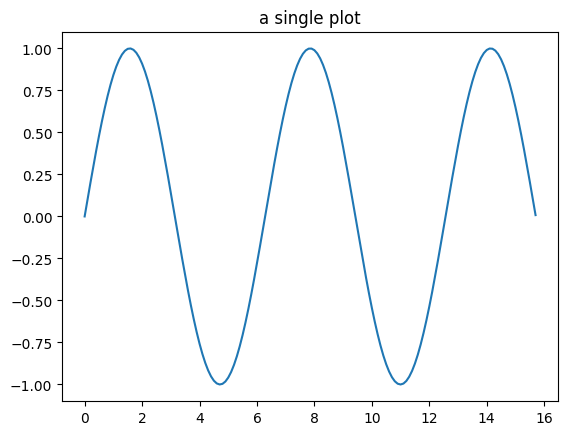

In [199]:
import numpy as np
import matplotlib.pyplot as plt 

# 1. setup linearly spaced numbers
x = np.arange(0, 5*np.pi, 0.1)
# x = np.linspace(0, 2*np.pi, 400)
y1 = np.sin(x)
y2 = np.cos(x)

# 2. setup axes at the center
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.set_title('a single plot')


Text(0.5, 1.0, 'cos')

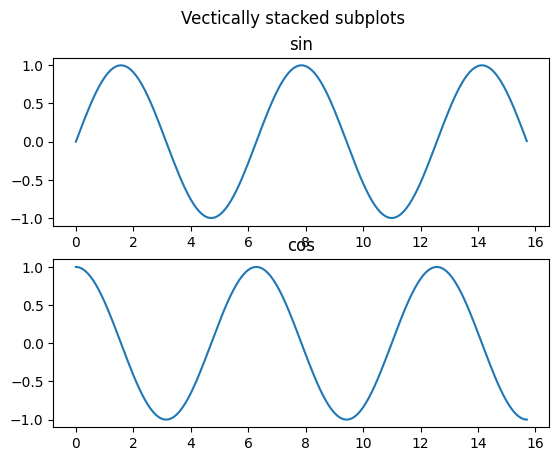

In [201]:
fig, axs = plt.subplots(2)
fig.suptitle('Vectically stacked subplots')
axs[0].plot(x, y1)
axs[0].set_title('sin')
axs[1].plot(x, y2)
axs[1].set_title('cos')

Text(0.5, 1.0, 'cos')

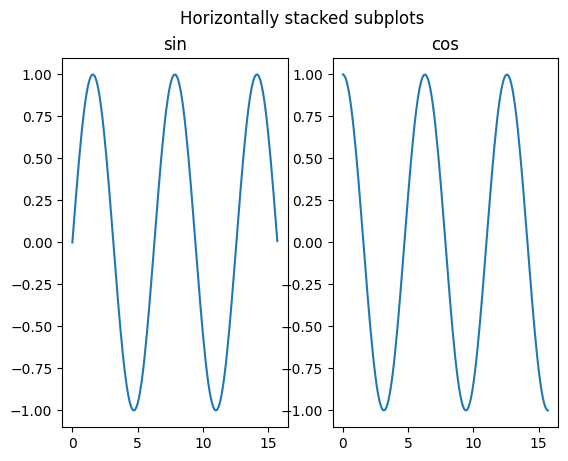

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y1)
ax1.set_title('sin')
ax2.plot(x, y2)
ax2.set_title('cos')

### 4.5 matplotlib colorbar()

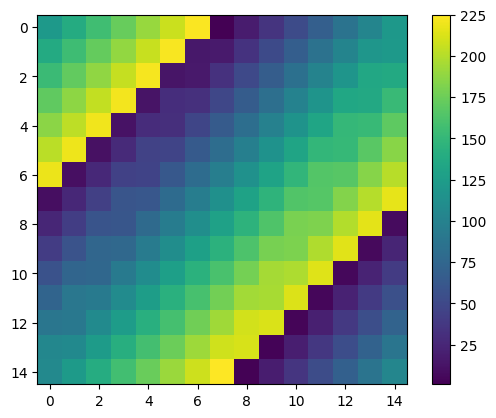

In [214]:
A = magic(15)
plt.imshow(A)
plt.colorbar()
plt.show()
# print(type(A))
# print(A)
# plt.colorbar(A)

#### 4.4.1 sample colorbar()

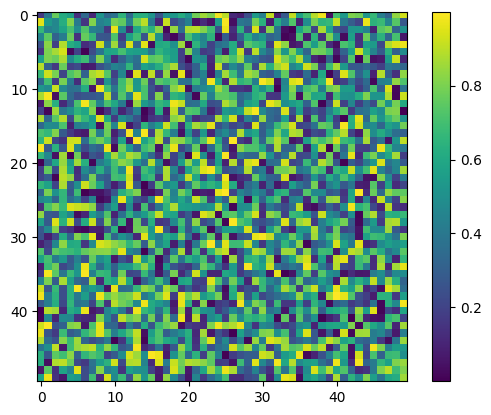

In [210]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.random.random((50,50)))
plt.colorbar()
plt.show()

In [213]:
# create 50x50 array
print(np.random.random((50,50)))

[[0.73418197 0.74493407 0.9659759  ... 0.42220403 0.06529553 0.01368635]
 [0.52533594 0.79390479 0.817055   ... 0.65779179 0.79966951 0.69654409]
 [0.30240065 0.36251579 0.81406901 ... 0.48290165 0.72489255 0.16840902]
 ...
 [0.97157792 0.77394072 0.53593436 ... 0.59818049 0.63988125 0.47865725]
 [0.32307048 0.69921066 0.29499861 ... 0.93566259 0.48914451 0.26762168]
 [0.98909769 0.27580813 0.29358154 ... 0.19649963 0.08639417 0.57821316]]


# 6. Control statement: for, while, if statement
- while loop: https://www.w3schools.com/python/python_while_loops.asp
- for loop: https://www.w3schools.com/python/python_for_loops.asp

In [228]:
# 1. while loop
i = 1
while i <= 5:
    # print(i)
    if i % 2 == 0:
        print(i)
        pass
    i += 1
    

# 2. for elements
print('====================================')
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)
print('====================================')  
for x in 'banana':
  print(x)
  
# 2. for, range() elements
print('====================================')
for x in range(1, 10, 2):
    print(x)

2
4
apple
banana
cherry
b
a
n
a
n
a
1
3
5
7
9


In [231]:
# current working directory
# https://stackoverflow.com/a/38481800
import os
os.getcwd()

'/Users/runzhou/git/machine-learning/machine-learning-andrewng/machine_learning-andrew_ng'

# 7. Vectorization